# Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv(url, names=columns)

| Column Name | Description (Meaning)                                            |
|-------------|-------------------------------------------------------------------|
| **age**     | Age of the patient (in years)                                    |
| **sex**     | Sex of the patient (1 = male, 0 = female)                        |
| **cp**      | Chest pain type (categorized from 1 to 4)                        |
| **trestbps**| Resting blood pressure (in mm Hg)                                |
| **chol**    | Serum cholesterol level (mg/dl)                                  |
| **fbs**     | Fasting blood sugar (>120 mg/dl; 1 = true, 0 = false)            |
| **restecg** | Resting electrocardiographic results (values from 0 to 2)        |
| **thalach** | Maximum heart rate achieved during exercise                      |
| **exang**   | Exercise-induced angina (1 = yes, 0 = no)                        |
| **oldpeak** | ST depression induced by exercise relative to rest               |
| **slope**   | The slope of the ST segment during peak exercise (values 1 to 3) |
| **ca**      | Number of major blood vessels colored by fluoroscopy (0 to 3)    |
| **thal**    | Thallium stress test result (values from 3 to 7)                 |
| **target**  | Diagnosis (0 = absence of heart disease, 1 = presence)           |


In [ ]:
# Preprocess data
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)  # Binary classification
df = df.replace('?', pd.NA).dropna()  # Handle missing values

In [ ]:
# Define features and target
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize and train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions
y_pred = logreg.predict(X_test)

In [ ]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[45  4]
 [ 7 34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        49
           1       0.89      0.83      0.86        41

    accuracy                           0.88        90
   macro avg       0.88      0.87      0.88        90
weighted avg       0.88      0.88      0.88        90



# Classification Metrics

Confusion Matrix

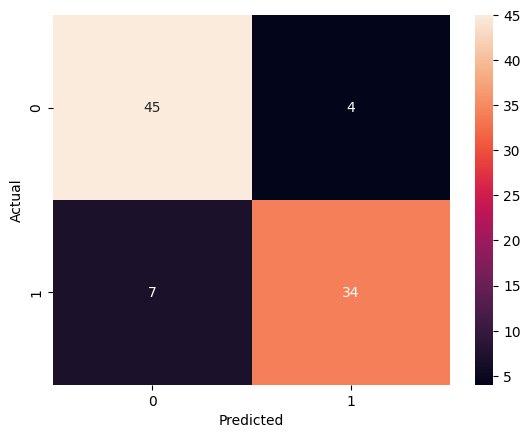

In [ ]:
# Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC and AUC

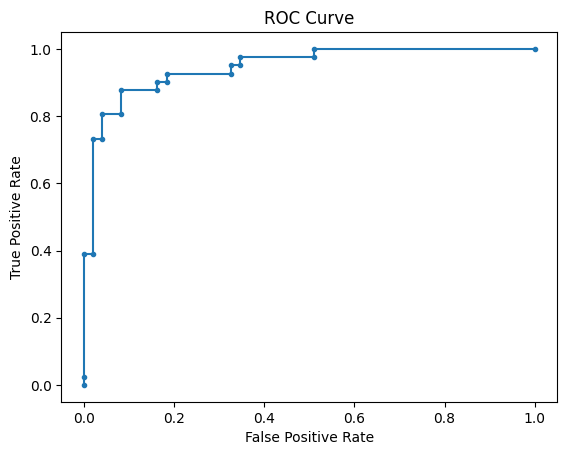

AUC Score: 0.9467396714783474


In [ ]:
y_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score}")

# Titanic Dataset

Load and Explore the Titanic Dataset

In [ ]:
import pandas as pd
import seaborn as sns

# Load the Titanic dataset from Seaborn
titanic = sns.load_dataset('titanic')

# Display the first few rows of the dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Check for missing values
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop columns that are not needed
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'adult_male', 'who'], axis=1)

# Handle missing values
titanic['age'].fillna(titanic['age'].mean(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
titanic['sex'] = label_encoder.fit_transform(titanic['sex'])
titanic['embarked'] = label_encoder.fit_transform(titanic['embarked'])
titanic['class'] = label_encoder.fit_transform(titanic['class'])

# Define features and target variable
X = titanic.drop('survived', axis=1)
y = titanic['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Building and Training the Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Making Predictions and Evaluating the Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Make predictions
y_pred = logreg.predict(X_test)

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[137  20]
 [ 31  80]]


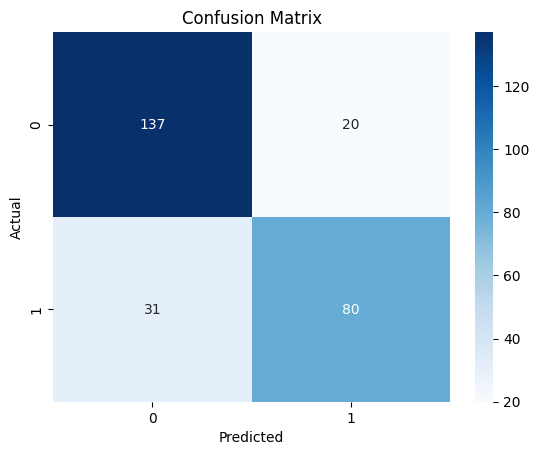

In [ ]:
# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.80      0.72      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [ ]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


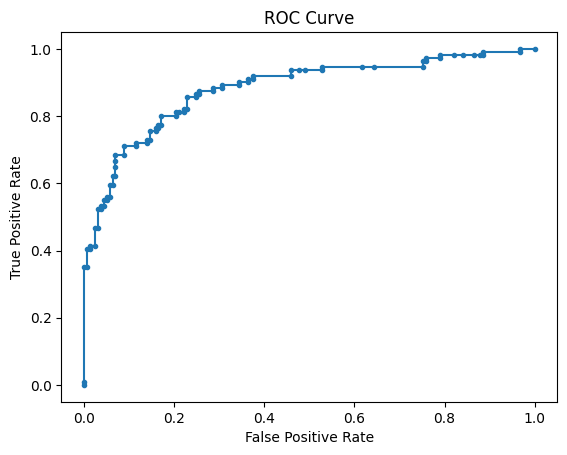

AUC Score: 0.88


In [ ]:
# ROC Curve and AUC Score
y_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")